<a href="https://colab.research.google.com/github/pavanbaloju/agrivision-semantic-segmentation/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !tar -xf drive/My\ Drive/Agriculture-Vision.tar

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("train4.csv", index_col= [0])
print(df.shape)
df.head()

(12901, 4)


,image_name,labels,pos_counts,label_count
0,11T3V93AF_2280-3416-2792-3928.jpg,4,12525,1
1,11T3V93AF_2373-2788-2885-3300.jpg,4,5384,1
2,11T3V93AF_2721-2503-3233-3015.jpg,4,1609,1
3,11T3V93AF_3083-3751-3595-4263.jpg,4,4514,1
4,11T3V93AF_3877-4192-4389-4704.jpg,4,3883,1


In [ ]:
df.dtypes

image_name     object
labels         object
pos_counts      int64
label_count     int64
dtype: object

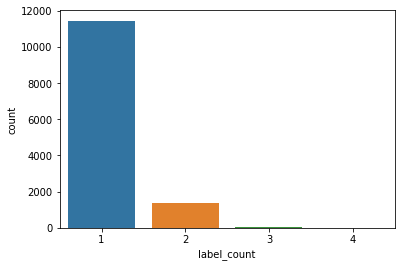

In [ ]:
sns.countplot(x= "label_count", data = df)

In [ ]:
df2 = df[df.label_count == 1]
df2.head()

,image_name,labels,pos_counts,label_count
0,11T3V93AF_2280-3416-2792-3928.jpg,4,12525,1
1,11T3V93AF_2373-2788-2885-3300.jpg,4,5384,1
2,11T3V93AF_2721-2503-3233-3015.jpg,4,1609,1
3,11T3V93AF_3083-3751-3595-4263.jpg,4,4514,1
4,11T3V93AF_3877-4192-4389-4704.jpg,4,3883,1


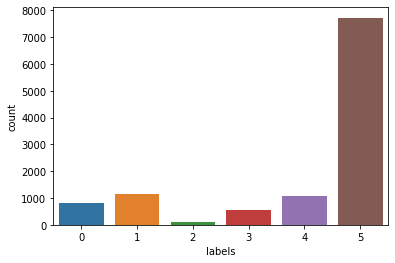

In [ ]:
sns.countplot(x = "labels", data = df2)

In [ ]:
temp = df2.groupby("labels").sum()
temp

,pos_counts,label_count
labels,,
0,98387991,811
1,17645878,1165
2,5244825,122
3,43257986,554
4,27027768,1061
5,465439819,7723


In [ ]:
temp["p/t"] = temp["pos_counts"]/(temp["label_count"]*512*512)
temp["p/t"]

labels
0    0.462787
1    0.057780
2    0.163995
3    0.297863
4    0.097175
5    0.229899
Name: p/t, dtype: float64

In [ ]:
five = df2[df2.labels == '5']
five["p/t"] = np.round((five["pos_counts"]/(512*512)),1)
five

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,image_name,labels,pos_counts,label_count,p/t
17,11UBQLX1B_1052-819-1564-1331.jpg,5,54381,1,0.2
18,11UBQLX1B_1071-8398-1583-8910.jpg,5,48816,1,0.2
19,11UBQLX1B_1105-5908-1617-6420.jpg,5,93794,1,0.4
20,11UBQLX1B_1105-6420-1617-6932.jpg,5,102795,1,0.4
21,11UBQLX1B_1105-6932-1617-7444.jpg,5,76947,1,0.3
...,...,...,...,...,...
12716,ZT13DBZBJ_520-7696-1032-8208.jpg,5,22964,1,0.1
12718,ZT13DBZBJ_764-7517-1276-8029.jpg,5,17374,1,0.1
12719,ZT13DBZBJ_764-8029-1276-8541.jpg,5,18021,1,0.1
12720,ZT13DBZBJ_980-8420-1492-8932.jpg,5,23465,1,0.1


In [ ]:
five[(five["p/t"]>0.3) & (five["p/t"]<0.7)]

,image_name,labels,pos_counts,label_count,p/t
19,11UBQLX1B_1105-5908-1617-6420.jpg,5,93794,1,0.4
20,11UBQLX1B_1105-6420-1617-6932.jpg,5,102795,1,0.4
23,11UBQLX1B_1153-3481-1665-3993.jpg,5,114094,1,0.4
24,11UBQLX1B_1153-3993-1665-4505.jpg,5,125631,1,0.5
25,11UBQLX1B_1172-2175-1684-2687.jpg,5,93912,1,0.4
...,...,...,...,...,...
12676,ZKDM3I7V4_7277-4039-7789-4551.jpg,5,116959,1,0.4
12678,ZKDM3I7V4_7323-4419-7835-4931.jpg,5,129127,1,0.5
12688,ZKDM3I7V4_7564-4598-8076-5110.jpg,5,120326,1,0.5
12689,ZKDM3I7V4_7613-4238-8125-4750.jpg,5,115321,1,0.4


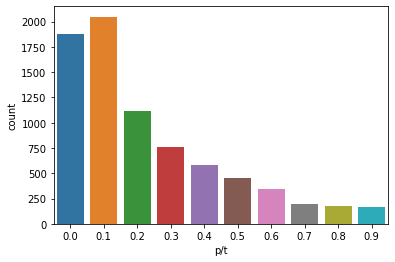

In [ ]:
sns.countplot(x= "p/t", data = five, )

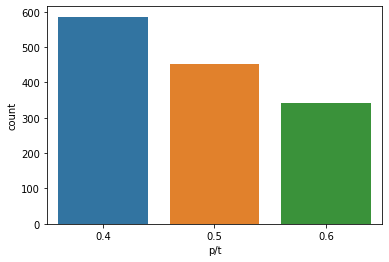

In [ ]:
sns.countplot(x= "p/t", data = five[(five["p/t"]>0.3) & (five["p/t"]<0.7)] )

In [ ]:
five[(five["p/t"]>0.3) & (five["p/t"]<0.7)].shape

(1380, 5)

In [ ]:
dat = five[(five["p/t"]>0.3) & (five["p/t"]<0.7)]
dat

,image_name,labels,pos_counts,label_count,p/t
19,11UBQLX1B_1105-5908-1617-6420.jpg,5,93794,1,0.4
20,11UBQLX1B_1105-6420-1617-6932.jpg,5,102795,1,0.4
23,11UBQLX1B_1153-3481-1665-3993.jpg,5,114094,1,0.4
24,11UBQLX1B_1153-3993-1665-4505.jpg,5,125631,1,0.5
25,11UBQLX1B_1172-2175-1684-2687.jpg,5,93912,1,0.4
...,...,...,...,...,...
12676,ZKDM3I7V4_7277-4039-7789-4551.jpg,5,116959,1,0.4
12678,ZKDM3I7V4_7323-4419-7835-4931.jpg,5,129127,1,0.5
12688,ZKDM3I7V4_7564-4598-8076-5110.jpg,5,120326,1,0.5
12689,ZKDM3I7V4_7613-4238-8125-4750.jpg,5,115321,1,0.4


In [ ]:
dat.pos_counts.sum() / (dat.shape[0] * 512*512)

0.4783248624939849

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, _ = train_test_split(dat["image_name"],dat.labels,stratify = dat["p/t"], shuffle = True, random_state = 42, test_size = 0.15)
X_train, X_val, _, _ = train_test_split(dat["image_name"],dat.labels,stratify = dat["p/t"], shuffle = True, random_state = 42, test_size = 0.25)

In [ ]:
train_list = X_train.to_list()
val_list = X_val.to_list()
test_list = X_test.to_list()

In [ ]:
len(train_list), len(val_list), len(test_list)

(1035, 345, 207)

In [ ]:
import cv2
def load_images(images_list):
  images = []
  masks = []
  for image in images_list:
    image_path = os.path.join("Agriculture-Vision/train/images/rgb/", image)
    images.append(cv2.imread(image_path,1))
    mask_path = os.path.join("Agriculture-Vision/train/labels/weed_cluster/", image[:-3]+"png")
    masks.append(cv2.imread(mask_path,0))
  images = np.array(images, dtype= np.uint8)
  masks  = np.expand_dims(np.array(masks, dtype=np.uint8), axis = -1)
  return images, masks

In [ ]:
train_imgs, train_masks = load_images(train_list)

In [ ]:
train_imgs.shape

(1035, 512, 512, 3)

In [ ]:
train_masks.shape

(1035, 512, 512, 1)

In [ ]:
type(train_imgs)

numpy.ndarray

In [ ]:
np.save("drive/My Drive/train_imgs.npy", train_imgs)
np.save("drive/My Drive/train_masks.npy", train_masks)

In [ ]:
del(train_imgs)
del(train_masks)

In [ ]:
val_imgs, val_masks = load_images(val_list)
np.save("drive/My Drive/val_imgs.npy", val_imgs)
np.save("drive/My Drive/val_masks.npy", val_masks)
del(val_imgs)
del(val_masks)
test_imgs, test_masks = load_images(test_list)
np.save("drive/My Drive/test_imgs.npy", test_imgs)
np.save("drive/My Drive/test_masks.npy",test_masks)
del(test_imgs)
del(test_masks)

In [ ]:
x = np.load("drive/My Drive/train_imgs.npy")
y = np.load("drive/My Drive/train_masks.npy")

In [ ]:
x.shape, y.shape

((1035, 512, 512, 3), (1035, 512, 512, 1))

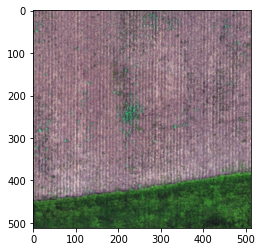

In [ ]:
plt.imshow(x[1,:,:,:])

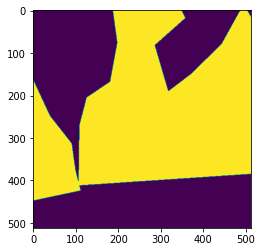

In [ ]:
plt.imshow(y[1,:,:,0])